In [2]:
print("tes-t")

tes-t


In [3]:
!pip install textstat
!pip install rouge_score
!pip install bert_score

DEPRECATION: Loading egg at /Users/mac/anaconda3/lib/python3.11/site-packages/python_docx-1.1.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/mac/anaconda3/lib/python3.11/site-packages/Pattern-3.6.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00a 0:00:01
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that 

In [4]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import backend as K 
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
import pickle
from textstat import flesch_reading_ease, flesch_kincaid_grade
from datasets import load_dataset, Dataset
from nltk.translate.bleu_score import corpus_bleu
from rouge_score import rouge_scorer
from bert_score import score
import seaborn as sns

In [5]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="Your max_length is set to *")

In [6]:
# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print("GPUs are available")
    # Optionally, you can set memory growth to avoid allocating all GPU memory at once
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("No GPUs available. Using CPU.")

No GPUs available. Using CPU.


In [7]:
contraction_mapping = {
    "ain't": "is not",
    "aren't": "are not", "can't": "cannot", "'cause": "because", "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would", "he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you",
    "how'll": "how will", "how's": "how is",
    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am",
    "I've": "I have", "i'd": "i would",
    "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have",
    "isn't": "is not", "it'd": "it would",
    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is",
    "let's": "let us", "ma'am": "madam",
    "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
    "so've": "so have", "so's": "so as",
    "this's": "this is", "that'd": "that would", "that'd've": "that would have", "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have", "there's": "there is", "here's": "here is", "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
    "to've": "to have",
    "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
    "we'll've": "we will have", "we're": "we are",
    "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
    "where'd": "where did", "where's": "where is",
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is",
    "who've": "who have",
    "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
    "won't've": "will not have",
    "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
    "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
    "you're": "you are", "you've": "you have"}
stop_words = set(stopwords.words('english'))

In [8]:
class DataPreprocessor:
    def __init__(self):
        pass
    
    def load_csv_from_google_drive(self, url, name):
        # Attempting to load a CSV file from a Google Drive link into a Pandas DataFrame.
        try:
            # Extracting file ID from the original URL to construct a direct download link.
            url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

            # Loading the CSV data from the constructed URL into a Pandas DataFrame.
            df = pd.read_csv(url,encoding='iso-8859-1')

            # Confirmation message upon successful loading of CSV data.
            print(f'{name} CSV loaded successfully.')

            # Returning the loaded DataFrame.
            return df

        except Exception as e:
            # Handling any exceptions that may occur during the process and printing the error message.
            print('Exception occurred: ', e)

    def load_data(self,):
        print('Loading the summary dataset...')
        summary_df  = self.load_csv_from_google_drive("https://drive.google.com/file/d/1jjjtai8R0BTfTtfucbOQPCJTllXfV9Dy/view?usp=sharing", "Summary")
        
        print('\nLoading the raw dataset...')
        raw_df  = self.load_csv_from_google_drive("https://drive.google.com/file/d/1pt4kBnL0i-qtBKwgxBeTTKnkGINq8miE/view?usp=sharing", "Raw")

        # preprocessing steps
        raw_df_copy =  raw_df.iloc[:,0:2].copy()
        summary_df_copy = summary_df.iloc[:,0:6].copy()
        summary_df_copy['text'] = summary_df_copy['author'].str.cat(summary_df_copy['date'].str.cat(summary_df_copy['read_more'].str.cat(summary_df_copy['text'].str.cat(summary_df_copy['ctext'], sep = " "), sep =" "),sep= " "), sep = " ")

        data = pd.DataFrame()
        data['text'] = pd.concat([raw_df_copy['text'], summary_df_copy['text']], ignore_index=True)
        data['summary'] = pd.concat([raw_df_copy['headlines'], summary_df_copy['headlines']], ignore_index=True)

        return data
 
    
    def replace_contractions(self, text):
        def replace(match):
            return contraction_mapping[match.group(0)]
        return re.sub("|".join(contraction_mapping.keys()), replace, text)

    
    def clean_text(self, _column):
        for _text in _column:
             # Convert to string and lowercase once
            _text = str(_text).lower() 

            # Remove escape characters
            _text = re.sub(r"[\t\r\n]", ' ', _text)

            # Remove multiple consecutive special characters
            _text = re.sub(r"(__+|--+|~~+|\+\+|\.\.+)", ' ', _text)

            # Remove specific special characters
            _text = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', _text)

            # Remove specific patterns
            _text = re.sub(r"(mailto:|\\x9\d)", ' ', _text)
            _text = re.sub(r"([iI][nN][cC]\d+)", 'inc_num', _text)
            _text = re.sub(r"([cC][mM]\d+)|([cC][hH][gG]\d+)", 'cm_num', _text)

            # Remove punctuation at the end of words
            _text = re.sub(r"(\.\s+|\-\s+|\:\s+)", ' ', _text)

            # Remove single characters between spaces
            _text = re.sub(r"(\s+.\s+)", ' ', _text)

            # Replace URLs with domain name
            try:
                url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', _text)
                if url:
                    repl_url = url.group(3)
                    _text = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', repl_url, _text)
            except Exception:
                pass  # There might be emails with no URL in them

            yield re.sub(r"(\s+)", ' ', _text)


    def split_data(self, data):
        return train_test_split(data['text'], data['summary'], test_size=0.1, random_state=42, shuffle=True)

In [9]:
preprocessor = DataPreprocessor()
dataset = preprocessor.load_data()

Loading the summary dataset...
Summary CSV loaded successfully.

Loading the raw dataset...
Raw CSV loaded successfully.


In [9]:
# cnn_df  = preprocessor.load_csv_from_google_drive("https://drive.google.com/file/d/1c02H9ySf2-nc1L0bg7sq5CgwOYd_lfOj/view?usp=sharing", "Cnn/Mail")
# cnn_df.columns

In [10]:
dataset.columns

Index(['text', 'summary'], dtype='object')

In [11]:
dataset.shape

(102915, 2)

<!-- (102915, 2) --> previous dataset shape

In [12]:
dataset.head(2)

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program ...",upGrad learner switches to career in ML & Al with 90% salary hike
1,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coi...",Delhi techie wins free food from Swiggy for one year on CRED


In [13]:
# load data from cnn
# cnn_dataset = load_dataset("ccdv/cnn_dailymail","3.0.0",trust_remote_code=True)

In [14]:
# cnn_dataset

In [15]:
# train_cnn_dataset = cnn_dataset['train'].to_pandas()

# train_cnn_dataset.shape,

In [16]:
# train_cnn_dataset.columns

In [17]:
# # Rename columns in the CNN/DailyMail DataFrame
# train_cnn_dataset = train_cnn_dataset.rename(columns={"article": "text", "highlights": "summary"})

In [18]:
# train_cnn_dataset.head(2)

In [19]:
# train_cnn_dataset.iloc[0, 1]

In [20]:
# # Sample 2% of the data randomly
# # Set random_state for reproducibility
# train_cnn_dataset = train_cnn_dataset.sample(frac=0.15, random_state=1) 

# # Drop the 'id' column
# train_cnn_dataset = train_cnn_dataset.drop(columns=['id'])

# train_cnn_dataset.shape

In [21]:
# train_cnn_dataset.to_csv('cnn_train.csv')

In [22]:
# train_cnn_dataset.columns

In [23]:
# Combine the datasets
# df = pd.concat([dataset, train_cnn_dataset], ignore_index=True)

In [24]:
df = dataset

In [25]:
df.columns

Index(['text', 'summary'], dtype='object')

In [26]:
df.shape

(102915, 2)

In [27]:
# df.to_csv('combined_data.csv')

### Data Exploration

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102915 entries, 0 to 102914
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     102797 non-null  object
 1   summary  102915 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [29]:
df.describe()

,text,summary
count,102797,102915
unique,102756,99916
top,"England was beaten at home for the first time by Australia in 1882, following which an English newspaper featured a mock obituary of English cricket. ""The body will be cremated and the ashes taken...",Warne rightly predicted India-Eng 2011 WC match to be a tie
freq,2,3


In [30]:
df.head(2)

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program ...",upGrad learner switches to career in ML & Al with 90% salary hike
1,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coi...",Delhi techie wins free food from Swiggy for one year on CRED


In [31]:
df['text'] = df['text'].apply(str).apply(preprocessor.replace_contractions)
df['summary'] = df['summary'].apply(str).apply(preprocessor.replace_contractions)

In [32]:
df.head(2)

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program ...",upGrad learner switches to career in ML & Al with 90% salary hike
1,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coi...",Delhi techie wins free food from Swiggy for one year on CRED


In [33]:
df['cleaned_text'] = pd.Series(preprocessor.clean_text(df['text']))
df['cleaned_summary'] = pd.Series(preprocessor.clean_text(df['summary']))

In [34]:
df.head(2)

,text,summary,cleaned_text,cleaned_summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program ...",upGrad learner switches to career in ML & Al with 90% salary hike,saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgra...,upgrad learner switches to career in ml al with 90% salary hike
1,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coi...",Delhi techie wins free food from Swiggy for one year on CRED,kunal shah credit card bill payment platform cred gave users chance to win free food from swiggy for one year pranav kaushik delhi techie bagged this reward after spending 2000 cred coins users ge...,delhi techie wins free food from swiggy for one year on cred


In [35]:
df.shape

(102915, 4)

In [36]:
df['text_len'] = df['text'].apply(lambda x: len(x.split()))
df['summary_len'] = df['summary'].apply(lambda x: len(x.split()))

In [37]:
df.head(2)

,text,summary,cleaned_text,cleaned_summary,text_len,summary_len
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program ...",upGrad learner switches to career in ML & Al with 90% salary hike,saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgra...,upgrad learner switches to career in ml al with 90% salary hike,60,13
1,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coi...",Delhi techie wins free food from Swiggy for one year on CRED,kunal shah credit card bill payment platform cred gave users chance to win free food from swiggy for one year pranav kaushik delhi techie bagged this reward after spending 2000 cred coins users ge...,delhi techie wins free food from swiggy for one year on cred,60,12


In [38]:
text_len_percentiles = df['text_len'].quantile([0.5, 0.75, 0.9, 0.95, 0.99])
summary_len_percentiles = df['summary_len'].quantile([0.5, 0.75, 0.9, 0.95, 0.99])

print("Text Length Percentiles:\n", text_len_percentiles)
print("Summary Length Percentiles:\n", summary_len_percentiles)

Text Length Percentiles:
 0.50     59.0
0.75     60.0
0.90     61.0
0.95     62.0
0.99    487.0
Name: text_len, dtype: float64
Summary Length Percentiles:
 0.50    10.0
0.75    11.0
0.90    11.0
0.95    12.0
0.99    13.0
Name: summary_len, dtype: float64


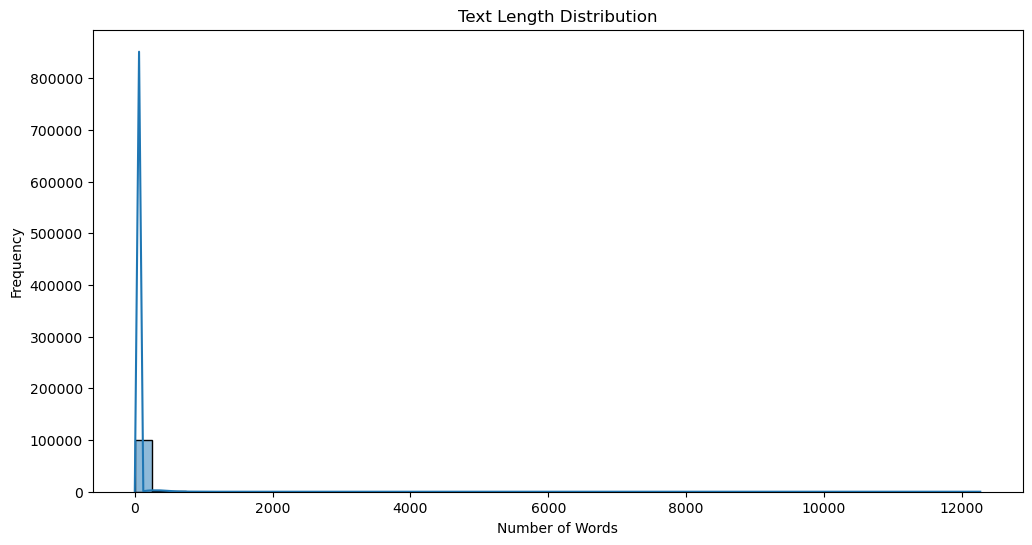

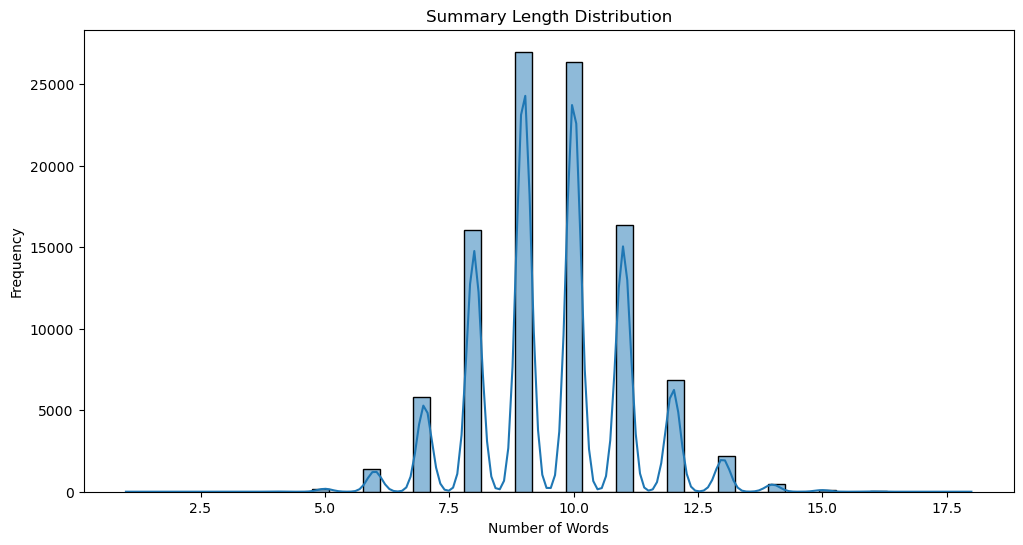

In [39]:
# Plot text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['text_len'], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Plot summary length distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['summary_len'], bins=50, kde=True)
plt.title("Summary Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [40]:
# df.to_csv('./cleaned_summary.csv')

In [41]:
# choose 95th percentile

max_text_len = int(text_len_percentiles[0.95]) if int(text_len_percentiles[0.95]) > 100 else 100
max_summary_len = int(summary_len_percentiles[0.95]) if int(summary_len_percentiles[0.95]) > 15 else 15

max_text_len, max_summary_len

(100, 15)

In [42]:
# Select the Summaries and Text between max_len defined above

cleaned_text = np.array(df['cleaned_text'])
cleaned_summary = np.array(df['cleaned_summary'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if (len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_text[i].split()) <= max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

new_df = pd.DataFrame({
    'text': short_text,
    'summary': short_summary
})

In [43]:
new_df.head(2)

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgra...,upgrad learner switches to career in ml al with 90% salary hike
1,kunal shah credit card bill payment platform cred gave users chance to win free food from swiggy for one year pranav kaushik delhi techie bagged this reward after spending 2000 cred coins users ge...,delhi techie wins free food from swiggy for one year on cred


In [44]:
new_df.shape

(98572, 2)

In [45]:
# Add sostok and eostok at 
new_df['summary'] = new_df['summary'].apply(lambda x: f'sostok {x} eostok')

In [46]:
new_df.head(2)

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgra...,sostok upgrad learner switches to career in ml al with 90% salary hike eostok
1,kunal shah credit card bill payment platform cred gave users chance to win free food from swiggy for one year pranav kaushik delhi techie bagged this reward after spending 2000 cred coins users ge...,sostok delhi techie wins free food from swiggy for one year on cred eostok


**SEQ2SEQ MODEL BUILDING **

Split the data to TRAIN and VALIDATION sets

In [47]:
x_tr, x_val, y_tr, y_val = preprocessor.split_data(new_df)

print(f'x_tr.shape: {x_tr.shape[0]}')
print(f'y_tr.shape: {y_tr.shape[0]}')
print(f'x_val.shape: {x_val.shape[0]}')
print(f'y_val.shape: {y_val.shape[0]}')

x_tr.shape: 88714
y_tr.shape: 88714
x_val.shape: 9858
y_val.shape: 9858


In [48]:
print(x_val.shape)
print(y_val.shape)
print(x_tr.shape)
print(y_tr.shape)

(9858,)
(9858,)
(88714,)
(88714,)


In [49]:
# Lets tokenize the text to get the vocab count

# prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

**RARE WORD ANALYSIS FOR X i.e 'text'**
* tot_cnt gives the size of vocabulary (which means every unique words in the text)

* cnt gives me the no. of rare words whose count falls below threshold

* tot_cnt - cnt gives me the top most common words

In [50]:
def find_text_frequency_count(tokenized_text, threshold):
    # Initialize count and frequency for words below the threshold
    count = 0
    frequency = 0

    # Calculate total count of words and their total frequency
    total_count = len(tokenized_text.word_counts)
    total_frequency = 0

    # Iterate through the word counts
    for value in tokenized_text.word_counts.values():
        total_frequency += value
        
        # Check if the word count is below the threshold
        if value < threshold:
            count += 1
            frequency += value

    # Return the results
    return count, total_count, frequency, total_frequency

In [51]:
def tokenize_text(_train, _validate, num_words):
    # prepare a tokenizer for reviews on training data
    _tokenizer = Tokenizer(num_words=num_words)
    _tokenizer.fit_on_texts(list(_train))

    # convert text sequences into integer sequences
    _train_seq = _tokenizer.texts_to_sequences(_train)
    _validate_seq = _tokenizer.texts_to_sequences(_validate)

    # padding zero upto maximum length
    _train = pad_sequences(
        _train_seq,  maxlen=max_text_len, padding='post')
    _validate = pad_sequences(
        _validate_seq, maxlen=max_text_len, padding='post')

    vocab_size = len(_tokenizer.word_index) + 1

    return _train, _validate, vocab_size, _tokenizer
    #prepare a tokenizer for reviews on training data

#     _tokenizer = Tokenizer(num_words=num_words) 
#     _tokenizer.fit_on_texts(list(_train))

#     #convert text sequences into integer sequences (i.e one-hot encodeing all the words)
#     _tr_seq    =   _tokenizer.texts_to_sequences(_train) 
#     _val_seq   =   _tokenizer.texts_to_sequences(_validate)

#     #padding zero upto maximum length
#     _train    =   pad_sequences(_tr_seq,  maxlen=max_text_len, padding='post')
#     _validate  =   pad_sequences(_val_seq, maxlen=max_text_len, padding='post')

#     #size of vocabulary ( +1 for padding token)
#     vocab_size   =  _tokenizer.num_words + 1

# #     print("Size of vocabulary in X = {}".format(x_voc))
#     return _train, _validate, vocab_size, _tokenizer

In [52]:
count, total_count, frequency, total_frequency = find_text_frequency_count(x_tokenizer, 4)

print(f"Rare vocabulary words in train dataset: {round((count/total_count)*100, 2)}%")
print(f"Rare words total Coverage in train dataset: {round((frequency/total_frequency)*100, 2)}")

Rare vocabulary words in train dataset: 57.95%
Rare words total Coverage in train dataset: 1.34


In [53]:
count, total_count, frequency, total_frequency

(46007, 79397, 68918, 5155702)

In [54]:
# # prepare a tokenizer for reviews on training data
# x_train, x_validate, x_vocab_size, x_tokenizer = tokenize_text(x_tr, x_val, total_count-count)

# print(f"X vocabulary size is: {x_vocab_size}")

In [55]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=total_count-count) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_vocab_size   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_vocab_size))

Size of vocabulary in X = 33391


**RARE WORD ANALYSIS FOR Y i.e 'summary'**
* tot_cnt gives the size of vocabulary (which means every unique words in the text)

* cnt gives me the no. of rare words whose count falls below threshold

* tot_cnt - cnt gives me the top most common words

In [56]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [57]:
count, total_count, frequency, total_frequency = find_text_frequency_count(y_tokenizer, threshold=6)

print(f"Rare vocabulary words in test dataset: {round((count/total_count)*100, 2)}%")
print(f"Rare words total Coverage in test dataset: {round((frequency/total_frequency)*100, 2)}")

Rare vocabulary words in test dataset: 66.36%
Rare words total Coverage in test dataset: 4.15


In [58]:
count, total_count, frequency, total_frequency

(22860, 34450, 43155, 1038809)

In [59]:
# # prepare a tokenizer for summary on training data
# y_train, y_validate, y_vocab_size, y_tokenizer = tokenize_text(y_tr, y_val, total_count-count)

# print(f"Y vocabulary size is: {y_vocab_size}")

In [60]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=total_count-count) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_vocab_size  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_vocab_size))

Size of vocabulary in Y = 11591


We will now remove "Summary" i.e Y (both train and val) which has only _START_ and _END_

In [61]:
# def filter_rows_by_nonzero_count(_x_data, _y_data):
#     # Create a boolean mask for rows with exactly two non-zero elements
#     mask = np.array([np.count_nonzero(row) != 2 for row in _y_data])

#     # Use the mask to filter out the rows
#     _x_data = _x_data[mask]
#     _y_data = _y_data[mask]

#     return _x_data, _y_data

# x_train, y_train = filter_rows_by_nonzero_count(x_tr, y_tr)
# x_validate, y_validate = filter_rows_by_nonzero_count(x_val, y_val)

In [62]:
# import numpy as np

# def filter_rows_by_nonzero_count(x_array, y_array, n = 2):
#     """
#     Remove rows from x_array and y_array where y_array has exactly n non-zero elements.

#     Parameters:
#     - x_array: np.ndarray
#         The input array from which rows will be removed.
#     - y_array: np.ndarray
#         The reference array where the rows will be checked for non-zero elements.
#     - n: int
#         The number of non-zero elements a row must have to be removed.

#     Returns:
#     - x_array: np.ndarray
#         The modified x_array with the specified rows removed.
#     - y_array: np.ndarray
#         The modified y_array with the specified rows removed.
#     """

#     # Initialize an empty list to store the indices of rows to be deleted
#     rows_to_delete = []

#     # Iterate over the rows of y_array
#     for idx, row in enumerate(y_array):
#         # Count the number of non-zero elements in the current row
#         non_zero_count = np.count_nonzero(row)
        
#         # If the row has exactly n non-zero elements, mark it for deletion
#         if non_zero_count == n:
#             rows_to_delete.append(idx)

#     # Convert the list of indices to a NumPy array for efficient indexing
#     rows_to_delete = np.array(rows_to_delete)

#     # Remove the rows from y_array and x_array using the indices
#     y_array = np.delete(y_array, rows_to_delete, axis=0)
#     x_array = np.delete(x_array, rows_to_delete, axis=0)
    
#     return x_array, y_array


In [63]:
# x_train, y_train = filter_rows_by_nonzero_count(x_tr, y_tr)
# x_validate, y_validate = filter_rows_by_nonzero_count(x_val, y_val)

In [64]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [65]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [66]:
print(x_val.shape)
print(y_val.shape)
print(x_tr.shape)
print(y_tr.shape)

(9858, 100)
(9858, 15)
(88714, 100)
(88714, 15)


In [67]:
print("Size of vocabulary from the w2v model = {}".format(x_vocab_size))

Size of vocabulary from the w2v model = 33391


In [68]:

print("Size of vocabulary from the w2v model = {}".format(x_vocab_size))

K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_vocab_size, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_vocab_size, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_vocab_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 33391


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 200)  │  6,678,200 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 100,      │    601,200 │ embedding[0][0]   │
│                     │ 300), (None,      │            │                   │
│                     │ 300), (None,      │            │                   │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 100,      │    721,200 │ lstm[0][0]        │
│                     │ 300), (None,      │            │                   │
│                     │ 300), (None,      │            │                   │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 200) │  2,318,200 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 100,      │    721,200 │ lstm_1[0][0]      │
│                     │ 300), (None,      │            │                   │
│                     │ 300), (None,      │            │                   │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, None,     │    601,200 │ embedding_1[0][0… │
│                     │ 300), (None,      │            │ lstm_2[0][1],     │
│                     │ 300), (None,      │            │ lstm_2[0][2]      │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, None,      │  3,488,891 │ lstm_3[0][0]      │
│ (TimeDistributed)   │ 11591)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 15,130,091 (57.72 MB)

 Trainable params: 15,130,091 (57.72 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=8,callbacks=[es],batch_size=256, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

# history=model.fit([x_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=8,callbacks=[es],batch_size=256, validation_data=([x_validate,y_validate[:,:-1]], y_validate.reshape(y_validate.shape[0],y_validate.shape[1], 1)[:,1:]))

Epoch 1/8
 75/347 ━━━━━━━━━━━━━━━━━━━━ 24:16 5s/step - loss: 7.2489

In [ ]:
plt.figure(figsize=(12, 8)) 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
def calculate_flesch_kincaid(text):
    # Using the textstat library for simplicity
    reading_ease = flesch_reading_ease(text)
    grade_level = flesch_kincaid_grade(text)
    return reading_ease, grade_level

In [ ]:
for i in range(0,10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    predicted_summary = decode_sequence(x_tr[i].reshape(1,max_text_len))
    print("Predicted summary:", predicted_summary )
    reading_ease, grade_level = calculate_flesch_kincaid(predicted_summary)
    print("\n")

In [ ]:
# class Seq2SeqModel:
#     def __init__(self,):
#         self.latent_dim = 300
#         self.embedding_dim = 200
#         self.batch_size = 256
#         self.epochs = 8 # change to higher number 8 50
#         self.model = None
#         self.encoder_model = None
#         self.decoder_model = None
#         self.encoder_inputs = None
#         self.encoder_outputs = None
#         self.decoder_inputs = None
#         self.decoder_outputs = None
#         self.dec_emb_layer = None
#         self.decoder_lstm = None
#         self.decoder_dense = None
#         self.state_h = None
#         self.state_c = None


#     def create_model(self, x_vocab_size, y_vocab_size):
#         # Encoder
#         self.encoder_inputs = Input(shape=(max_text_len,))

#         # embedding layer
#         enc_emb_layer =  Embedding(x_vocab_size, self.embedding_dim,trainable=True)(self.encoder_inputs)

#         # encoder lstm 1
#         encoder_lstm1 = LSTM(self.latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
#         encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb_layer)

#         # encoder lstm 2
#         encoder_lstm2 = LSTM(self.latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
#         encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#         # encoder lstm 3
#         encoder_lstm3=LSTM(self.latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
#         self.encoder_outputs, self.state_h, self.state_c= encoder_lstm3(encoder_output2)

#         # Set up the decoder, using `encoder_states` as initial state.
#         self.decoder_inputs = Input(shape=(None,))

#         # embedding layer
#         self.dec_emb_layer = Embedding(y_vocab_size, self.embedding_dim,trainable=True)
#         dec_emb = self.dec_emb_layer(self.decoder_inputs)

#         self.decoder_lstm = LSTM(self.latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
#         self.decoder_outputs,decoder_fwd_state, decoder_back_state = self.decoder_lstm(dec_emb,initial_state=[self.state_h, self.state_c])

#         # dense layer
#         self.decoder_dense =  TimeDistributed(Dense(y_vocab_size, activation='softmax'))
#         self.decoder_outputs = self.decoder_dense(self.decoder_outputs)

#         # Define the model 
#         self.model = Model([self.encoder_inputs, self.decoder_inputs], self.decoder_outputs)

#         # using sparse categorical cross-entropy as the loss function since it converts the integer sequence to a one-hot vector on the fly.
#         # This overcomes any memory issues.
#         self.model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

#         self.get_model_summary()

#         return self.model
    

#     def encode_decoder(self,):
#         # Encode the input sequence to get the feature vector
#         self.encoder_model = Model(inputs=self.encoder_inputs,outputs=[self.encoder_outputs, self.state_h, self.state_c])

#         # Decoder setup
#         # Below tensors will hold the states of the previous time step
#         decoder_state_input_h = Input(shape=(self.latent_dim,))
#         decoder_state_input_c = Input(shape=(self.latent_dim,))
#         decoder_hidden_state_input = Input(shape=(max_text_len, self.latent_dim))

#         # Get the embeddings of the decoder sequence
#         dec_emb2= self.dec_emb_layer(self.decoder_inputs) 
        
#         # To predict the next word in the sequence, set the initial states to the states from the previous time step
#         decoder_outputs2, state_h2, state_c2 = self.decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#         # A dense softmax layer to generate prob dist. over the target vocabulary
#         decoder_outputs2 = self.decoder_dense(decoder_outputs2) 

#         # Final decoder model
#         self.decoder_model = Model(
#             [self.decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
#             [decoder_outputs2] + [state_h2, state_c2]
#         )
        
    
# #     def decode_sequence(self, input_seq, target_word_index, reverse_target_word_index):
# #         # Encode the input as state vectors.
# #         e_out, e_h, e_c = self.encoder_model.predict(input_seq)

# #         # Generate empty target sequence of length 1.
# #         target_seq = np.zeros((1,1))

# #         # Populate the first word of target sequence with the start word.
# #         target_seq[0, 0] = target_word_index['sostok']

# #         stop_condition = False
# #         decoded_sentence = ''
# #         while not stop_condition:
# #             output_tokens, h, c = self.decoder_model.predict([target_seq] + [e_out, e_h, e_c])

# #             # Sample a token
# #             sampled_token_index = np.argmax(output_tokens[0, -1, :])
# #             sampled_token = reverse_target_word_index[sampled_token_index]

# #             if (sampled_token!='eostok'):
# #                 decoded_sentence += f' {sampled_token}'

# #             # Exit condition: either hit max length or find stop word.
# #             if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
# #                 stop_condition = True

# #             # Update the target sequence (of length 1).
# #             target_seq = np.zeros((1,1))
# #             target_seq[0, 0] = sampled_token_index

# #             # Update internal states
# #             e_h, e_c = h, c

# #         return decoded_sentence

#     def decode_sequence(self, input_seq, target_word_index, reverse_target_word_index):
#         # Encode the input as state vectors.
#         e_out, e_h, e_c = self.encoder_model.predict(input_seq)

#         # Generate empty target sequence of length 1.
#         target_seq = np.zeros((1, 1))

#         # Populate the first word of target sequence with the start word.
#         target_seq[0, 0] = target_word_index['sostok']

#         decoded_sentence = []
#         while True:
#             # Predict the next word in the sequence.
#             output_tokens, h, c = self.decoder_model.predict([target_seq] + [e_out, e_h, e_c])

#             # Sample a token.
#             sampled_token_index = np.argmax(output_tokens[0, -1, :])
#             sampled_token = reverse_target_word_index[sampled_token_index]

#             # Exit condition: either hit max length or find stop word.
#             if sampled_token == 'eostok' or len(decoded_sentence) >= (max_summary_len - 1):
#                 break

#             # Append the predicted word to the decoded sentence.
#             decoded_sentence.append(sampled_token)

#             # Update the target sequence (of length 1).
#             target_seq[0, 0] = sampled_token_index

#             # Update internal states.
#             e_h, e_c = h, c

#         return ' '.join(decoded_sentence)
    
    
#     def generate_summary(self, input_seq, target_word_index, reverse_target_word_index):
#         return ' '.join([reverse_target_word_index[i] for i in input_seq if i != 0 and i != target_word_index['sostok'] and i != target_word_index['eostok']])

    
#     def generate_text(self, input_seq, reverse_source_word_index):
#         return ' '.join([reverse_source_word_index[i] for i in input_seq if i != 0])


#     def get_model_summary(self):
#         return self.model.summary()
    
    
#     def plot(self, history):
#         plt.plot(history.history['loss'], label='train')
#         plt.plot(history.history['val_loss'], label='test')
#         plt.legend()
#         plt.show()
    

#     def save_model(self):
#         self.model.save('sequence_2_sequence.keras')
#         self.encoder_model.save('encoder_model.keras')
#         self.decoder_model.save('decoder_model.keras')
#         print('Model saved successfully...')
        
    
#     def train_model(self, _x_train, _y_train, _x_validate, _y_validate):
#         # used to stop model training once there's an increase in validation loss
#         es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

#         return self.model.fit(
#             [_x_train, _y_train[:,:-1]], 
#             _y_train.reshape(_y_train.shape[0],_y_train.shape[1], 1)[:,1:],
#             epochs=self.epochs,
#             callbacks=[es],
#             batch_size=self.batch_size, 
#             validation_data=(
#                 [_x_validate,_y_validate[:,:-1]], 
#                 _y_validate.reshape(_y_validate.shape[0],_y_validate.shape[1], 1)[:,1:]
#             )
#         )


In [ ]:
# s2s_model = Seq2SeqModel()

# model = s2s_model.create_model(x_vocab_size, y_vocab_size)

**Start training the model with the data**

In [ ]:
# history = s2s_model.train_model(x_train, y_train, x_validate, y_validate)

**Visualize the model learning**

In [ ]:
# s2s_model.plot(history)

**Next, let’s build the dictionary to convert the index to word for target and source vocabulary:**

In [ ]:
# reverse_source_word_index = x_tokenizer.index_word
# reverse_target_word_index = y_tokenizer.index_word
# target_word_index = y_tokenizer.word_index

In [ ]:
# # s2s_model.encode_decoder()

# # Encode the input sequence to get the feature vector
# encoder_model = Model(inputs=s2s_model.encoder_inputs,outputs=[s2s_model.encoder_outputs, s2s_model.state_h, s2s_model.state_c])

# # Decoder setup
# # Below tensors will hold the states of the previous time step
# decoder_state_input_h = Input(shape=(s2s_model.latent_dim,))
# decoder_state_input_c = Input(shape=(s2s_model.latent_dim,))
# decoder_hidden_state_input = Input(shape=(max_text_len,s2s_model.latent_dim))

# # Get the embeddings of the decoder sequence
# dec_emb2= s2s_model.dec_emb_layer(s2s_model.decoder_inputs) 
# # To predict the next word in the sequence, set the initial states to the states from the previous time step
# decoder_outputs2, state_h2, state_c2 = s2s_model.decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# # A dense softmax layer to generate prob dist. over the target vocabulary
# decoder_outputs2 = s2s_model.decoder_dense(decoder_outputs2) 

# # Final decoder model
# decoder_model = Model(
#     [s2s_model.decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
#     [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
# s2s_model.save_model()

In [ ]:
# model_components = {
#     'x_tokenizer': x_tokenizer,
#     'y_tokenizer': y_tokenizer,
#     'reverse_source_word_index': reverse_source_word_index,
#     'reverse_target_word_index': reverse_target_word_index,
#     'target_word_index': target_word_index,
#     'max_text_len': max_text_len,
#     'max_summary_len': max_summary_len
# }

# with open('model_components.pkl', 'wb') as f:
#     pickle.dump(model_components, f)
#     print('Model components saved successfully...')

**Run the model over the data to see the results**

In [ ]:
# def calculate_flesch_kincaid(text):
#     # Using the textstat library for simplicity
#     reading_ease = flesch_reading_ease(text)
#     grade_level = flesch_kincaid_grade(text)
#     return reading_ease, grade_level

In [ ]:
# def decode_sequence(input_seq):
#     # Encode the input as state vectors.
#     e_out, e_h, e_c = encoder_model.predict(input_seq)

#     # Generate empty target sequence of length 1.
#     target_seq = np.zeros((1,1))

#     # Populate the first word of target sequence with the start word.
#     target_seq[0, 0] = target_word_index['sostok']
#     print(f'target_seq: {target_seq}')

#     stop_condition = False
#     decoded_sentence = ''
#     while not stop_condition:
#         output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

#         # Sample a token
#         sampled_token_index = np.argmax(output_tokens[0, -1, :])
#         sampled_token = reverse_target_word_index[sampled_token_index]
        
#         print(f'decoded_sentence: {decoded_sentence} - {sampled_token}, {sampled_token_index}, {output_tokens} ')

#         if (sampled_token!='eostok'):
#             decoded_sentence += f' {sampled_token}'

#         # Exit condition: either hit max length or find stop word.
#         if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
#             stop_condition = True

#         # Update the target sequence (of length 1).
#         target_seq = np.zeros((1,1))
#         target_seq[0, 0] = sampled_token_index

#         # Update internal states
#         e_h, e_c = h, c

#     return decoded_sentence

In [ ]:
# print(x_tr[100], '\n')
# print(y_tr[100], '\n')

# print(decode_sequence(x_train[100].reshape(1,max_text_len)))

In [ ]:
# print(x_tr[1], '\n')
# print(y_tr[1], '\n')

# print(decode_sequence(x_train[1].reshape(1,max_text_len)))

In [ ]:
# for i in range(10):
# #     print('x -> ',x_tr[i])
# #     print('y -> ', s2s_model.generate_text(x_train[i], reverse_source_word_index))
# #     print('y -> ',y_tr[i])
#     print("Review:", s2s_model.generate_text(x_train[i], reverse_source_word_index))
#     print("Original summary:", s2s_model.generate_summary(y_train[i], target_word_index, reverse_target_word_index))
    
#     predicted_summary = s2s_model.decode_sequence(
#         x_train[i].reshape(1, max_text_len),
#         target_word_index, reverse_target_word_index
#     )
#     print(f"Predicted summary: {predicted_summary}")
    
#     print("Predicted summary2:", decode_sequence(x_train[i].reshape(1,max_text_len)))
    
#     reading_ease, grade_level = calculate_flesch_kincaid(predicted_summary)
#     print(f"Flesch Reading Ease Score: {reading_ease:.2f}")
#     print(f"Flesch-Kincaid Grade Level: {grade_level:.2f}")
#     print("\n")